In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Basic informations

In [2]:
df1=pd.read_csv('personality_dataset.csv')
df1.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [3]:
df1.shape

(2900, 8)

In [4]:
df1.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [6]:
df1.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


# Encoding

In [7]:
df=df1.copy()

In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [9]:
catg_cols=['Stage_fear','Drained_after_socializing']

In [10]:
ohe=OneHotEncoder(sparse_output=False,drop='first')
df_array=ohe.fit_transform(df[catg_cols])
encd_df=pd.DataFrame(df_array,columns=ohe.get_feature_names_out(catg_cols))

In [11]:
encd_df

,Stage_fear_Yes,Stage_fear_nan,Drained_after_socializing_Yes,Drained_after_socializing_nan
0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
2895,0.0,0.0,0.0,0.0
2896,0.0,0.0,0.0,0.0
2897,1.0,0.0,1.0,0.0
2898,1.0,0.0,1.0,0.0


In [12]:
df_final=pd.concat(
    [df.drop(columns=catg_cols).reset_index(drop=True),
     encd_df.reset_index(drop=True)],
    axis=1
)

In [13]:
df_final

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality,Stage_fear_Yes,Stage_fear_nan,Drained_after_socializing_Yes,Drained_after_socializing_nan
0,4.0,4.0,6.0,13.0,5.0,Extrovert,0.0,0.0,0.0,0.0
1,9.0,0.0,0.0,0.0,3.0,Introvert,1.0,0.0,1.0,0.0
2,9.0,1.0,2.0,5.0,2.0,Introvert,1.0,0.0,1.0,0.0
3,0.0,6.0,7.0,14.0,8.0,Extrovert,0.0,0.0,0.0,0.0
4,3.0,9.0,4.0,8.0,5.0,Extrovert,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2895,3.0,7.0,6.0,6.0,6.0,Extrovert,0.0,0.0,0.0,0.0
2896,3.0,8.0,3.0,14.0,9.0,Extrovert,0.0,0.0,0.0,0.0
2897,4.0,1.0,1.0,4.0,0.0,Introvert,1.0,0.0,1.0,0.0
2898,11.0,1.0,NaN,2.0,0.0,Introvert,1.0,0.0,1.0,0.0


In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_final['Personality']=le.fit_transform(df_final['Personality'])

In [15]:
df_final

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality,Stage_fear_Yes,Stage_fear_nan,Drained_after_socializing_Yes,Drained_after_socializing_nan
0,4.0,4.0,6.0,13.0,5.0,0,0.0,0.0,0.0,0.0
1,9.0,0.0,0.0,0.0,3.0,1,1.0,0.0,1.0,0.0
2,9.0,1.0,2.0,5.0,2.0,1,1.0,0.0,1.0,0.0
3,0.0,6.0,7.0,14.0,8.0,0,0.0,0.0,0.0,0.0
4,3.0,9.0,4.0,8.0,5.0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2895,3.0,7.0,6.0,6.0,6.0,0,0.0,0.0,0.0,0.0
2896,3.0,8.0,3.0,14.0,9.0,0,0.0,0.0,0.0,0.0
2897,4.0,1.0,1.0,4.0,0.0,1,1.0,0.0,1.0,0.0
2898,11.0,1.0,NaN,2.0,0.0,1,1.0,0.0,1.0,0.0


# Imputation

In [16]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [17]:
x =df_final.drop(columns=['Personality'])
y=df_final['Personality']

In [18]:
imputer= IterativeImputer(random_state=0)

In [19]:
x_imputed=imputer.fit_transform(x)
x_imputed_df=pd.DataFrame(x_imputed,columns=x.columns)

In [20]:
df_imputed=pd.concat([x_imputed_df,y.reset_index(drop=True)],axis=1)

In [21]:
df_imputed.isnull().sum()

Time_spent_Alone                 0
Social_event_attendance          0
Going_outside                    0
Friends_circle_size              0
Post_frequency                   0
Stage_fear_Yes                   0
Stage_fear_nan                   0
Drained_after_socializing_Yes    0
Drained_after_socializing_nan    0
Personality                      0
dtype: int64

# Scaling

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler=StandardScaler()

In [24]:
df_scaled=df_imputed.copy()

In [25]:
x=df_scaled.drop(columns=['Personality'])
y=df_scaled['Personality']

In [26]:
x_scaled=scaler.fit_transform(x)

In [27]:
type(x_scaled)

numpy.ndarray

In [28]:
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)

In [29]:
df_final_scaled=pd.concat([x_scaled,y.reset_index(drop=True)],axis=1)
df_final_scaled

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear_Yes,Stage_fear_nan,Drained_after_socializing_Yes,Drained_after_socializing_nan,Personality
0,-0.144367,0.013941,1.337843,1.575391,0.491733,-0.972784,-0.160694,-0.970772,-0.135124,0
1,1.297679,-1.367729,-1.339898,-1.468651,-0.193871,1.027977,-0.160694,1.030108,-0.135124,1
2,1.297679,-1.022311,-0.447318,-0.297866,-0.536674,1.027977,-0.160694,1.030108,-0.135124,1
3,-1.298003,0.704776,1.784133,1.809548,1.520141,-0.972784,-0.160694,-0.970772,-0.135124,0
4,-0.432776,1.741028,0.445262,0.404606,0.491733,-0.972784,-0.160694,-0.970772,-0.135124,0
...,...,...,...,...,...,...,...,...,...,...
2895,-0.432776,1.050194,1.337843,-0.063708,0.834536,-0.972784,-0.160694,-0.970772,-0.135124,0
2896,-0.432776,1.395611,-0.001028,1.809548,1.862943,-0.972784,-0.160694,-0.970772,-0.135124,0
2897,-0.144367,-1.022311,-0.893608,-0.532023,-1.222279,1.027977,-0.160694,1.030108,-0.135124,1
2898,1.874498,-1.022311,-0.931494,-1.000337,-1.222279,1.027977,-0.160694,1.030108,-0.135124,1


In [30]:
type(df_final_scaled)

pandas.core.frame.DataFrame

# Analysis by  data ploting

In [31]:
from sklearn.model_selection import train_test_split,cross_val_score
import scipy.stats as stats
x_train,x_test,y_train,y_test=train_test_split(df_final_scaled.drop(columns=['Personality']),df_final_scaled['Personality'],test_size=0.2)

In [32]:
x_train.shape,x_test.shape

((2320, 9), (580, 9))

In [33]:
x_train.columns

Index(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
       'Friends_circle_size', 'Post_frequency', 'Stage_fear_Yes',
       'Stage_fear_nan', 'Drained_after_socializing_Yes',
       'Drained_after_socializing_nan'],
      dtype='object')

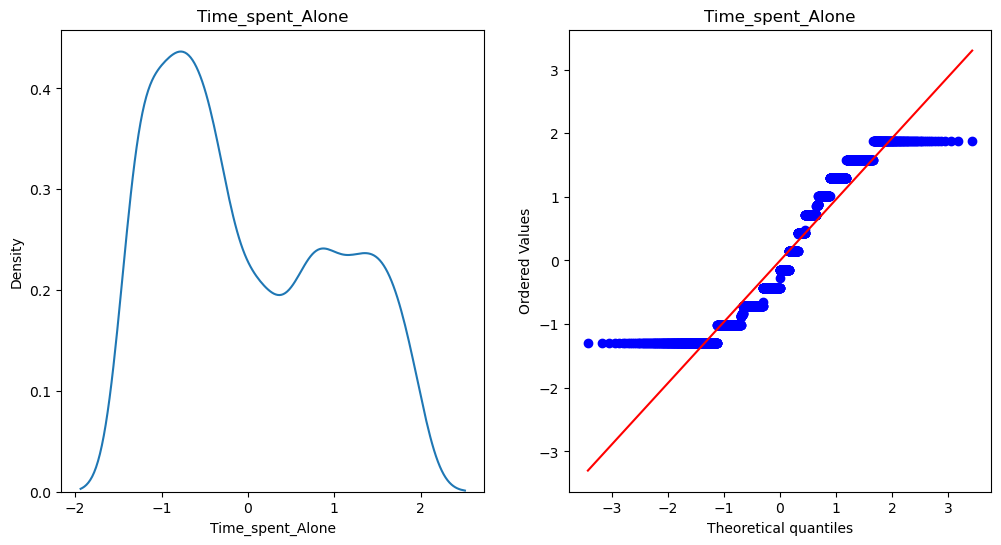

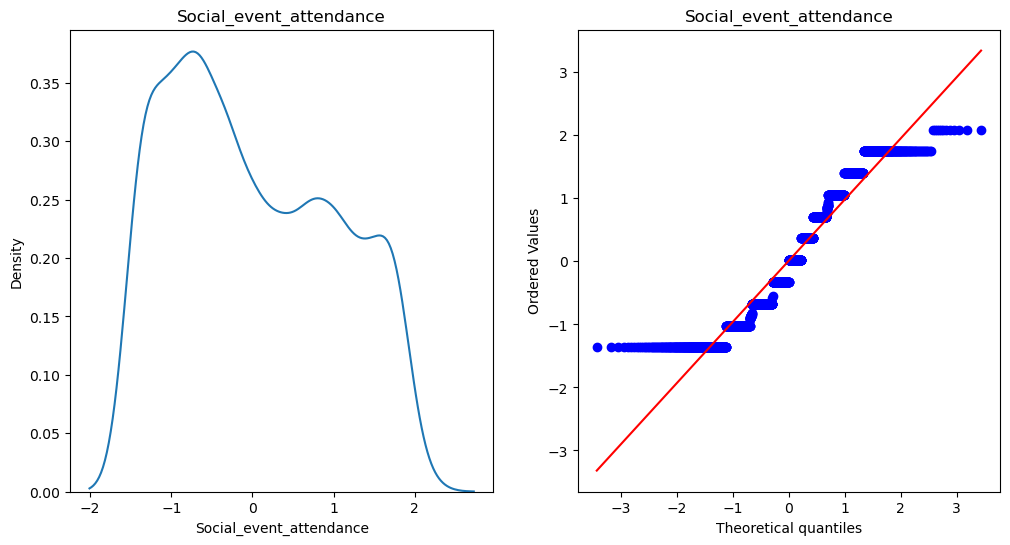

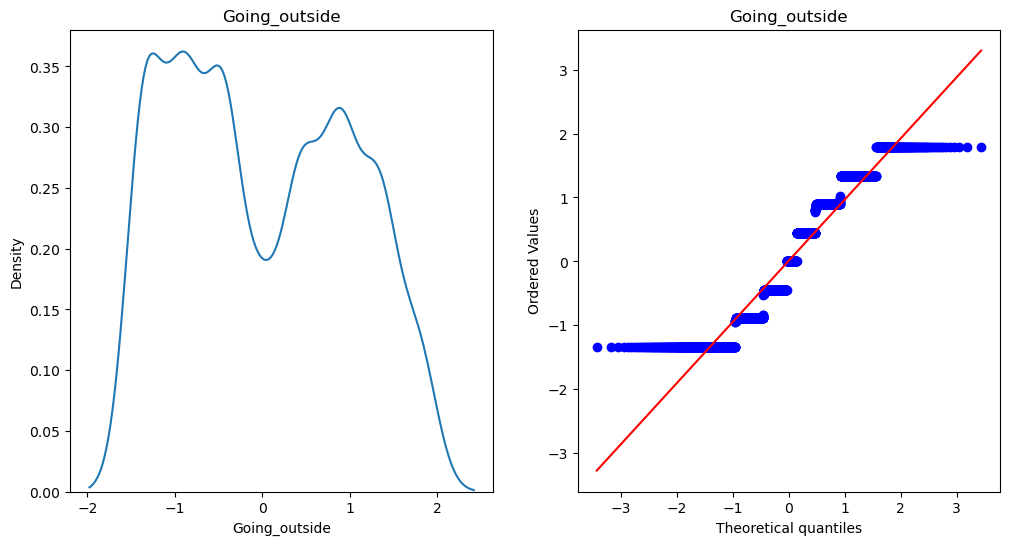

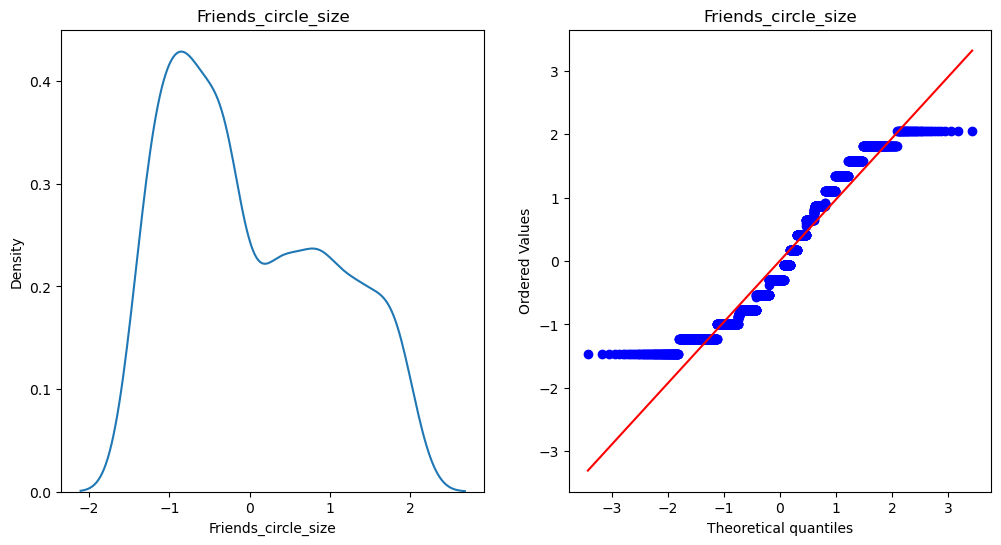

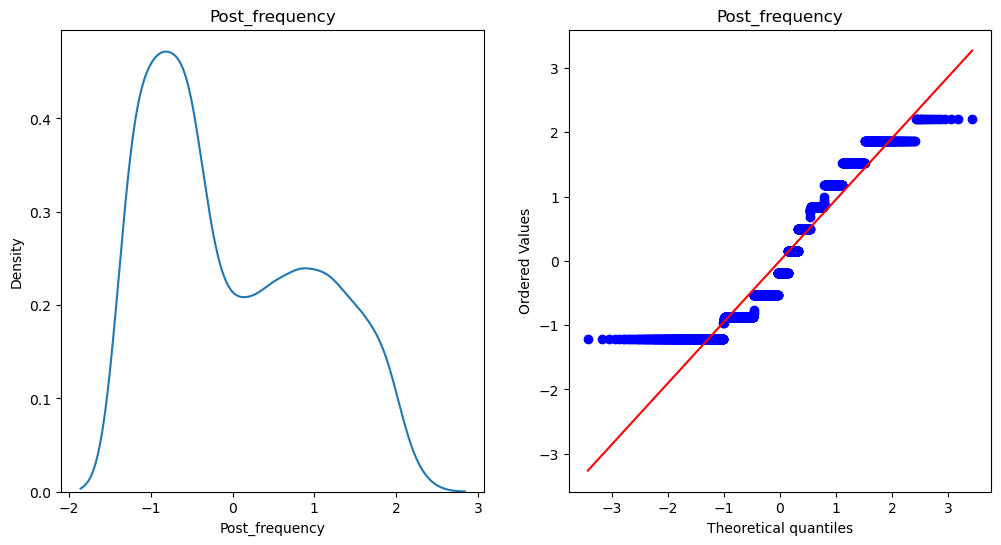

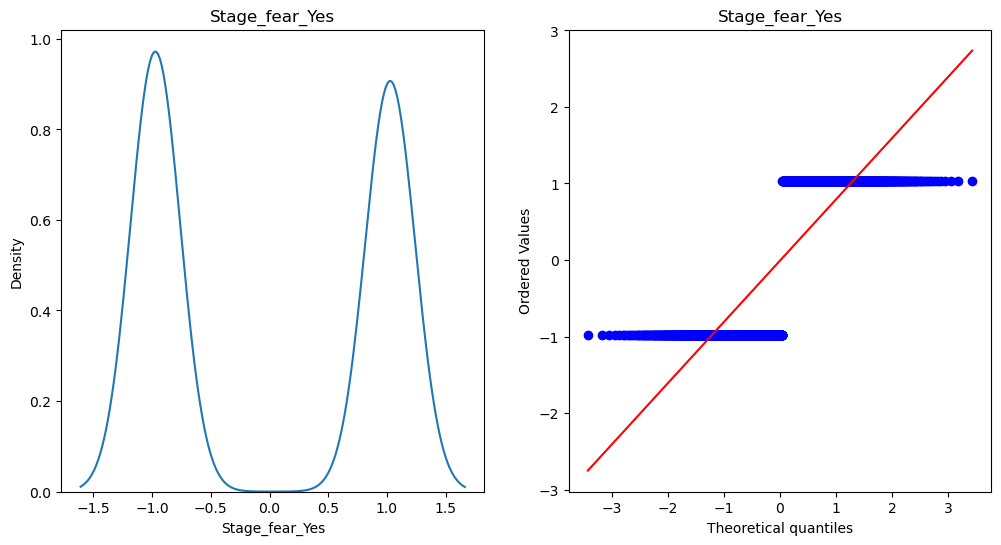

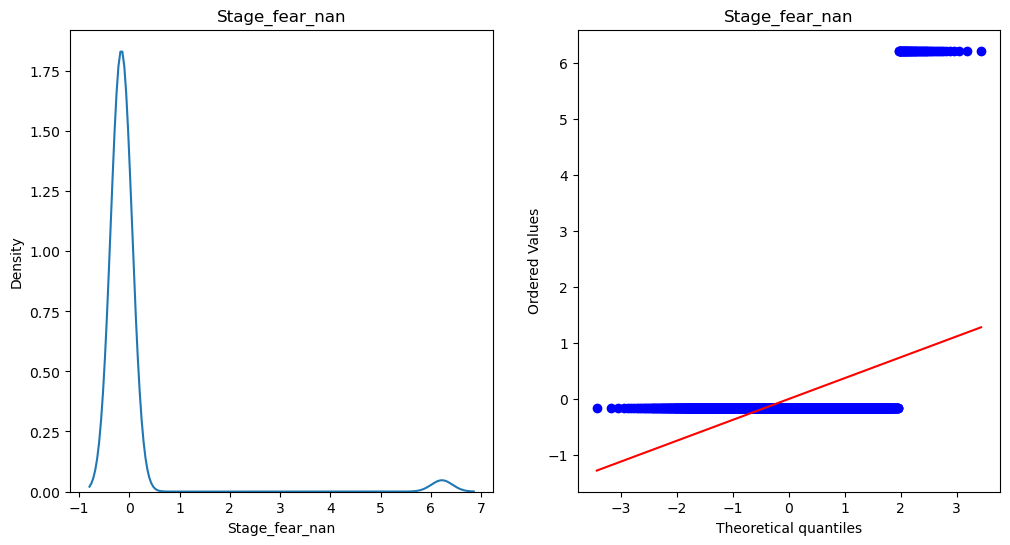

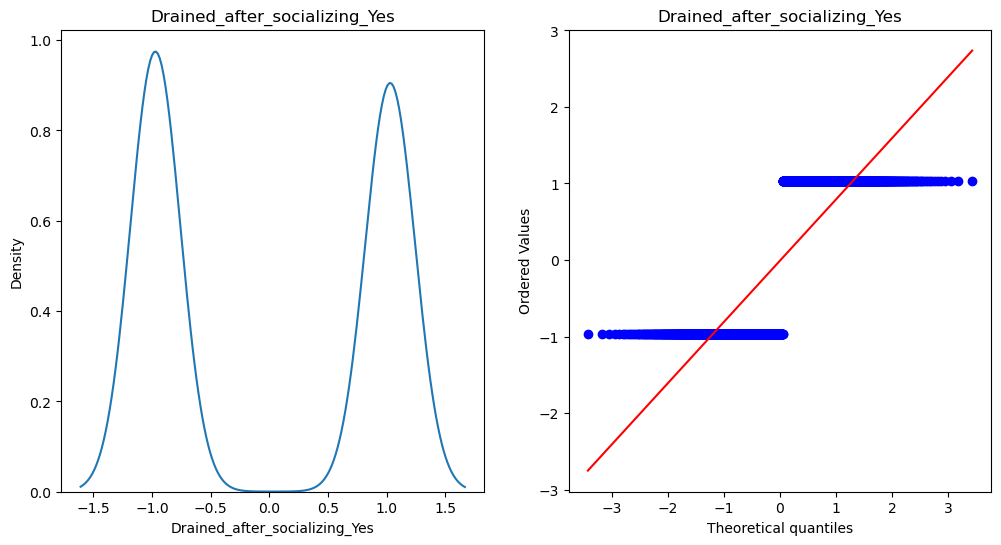

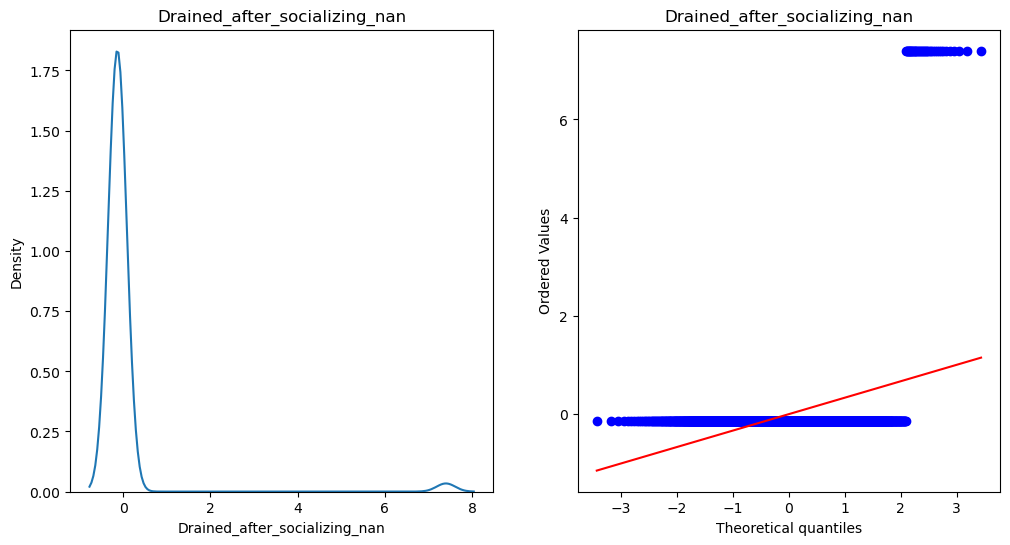

In [34]:
for col in x_train.columns:
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.kdeplot(x_train[col])
    plt.title(col)

    plt.subplot(1,2,2)
    stats.probplot(x_train[col],dist='norm',plot=plt)
    plt.title(col)
    plt.show()

# As we can see some of the column's figures are right skewed ,hence now we will apply the default PowerTransformation: Yeo johnson Transforation

In [39]:
from sklearn.preprocessing import PowerTransformer

In [41]:
pt=PowerTransformer(method='yeo-johnson')
x_train_trf=pt.fit_transform(x_train)
x_test_trf=pt.transform(x_test)

In [42]:
x_train_trf_df=pd.DataFrame(x_train_trf,columns=x_train.columns)
x_test_trf_df=pd.DataFrame(x_test_trf,columns=x_test.columns)

In [43]:
x_train_trf_df

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear_Yes,Stage_fear_nan,Drained_after_socializing_Yes,Drained_after_socializing_nan
0,-1.458640,0.111560,1.289999,0.078557,0.634141,-0.966092,-0.160128,-0.963593,-0.135784
1,1.445073,-0.251544,-0.411178,-1.390631,-0.445908,1.035098,-0.160128,1.037782,-0.135784
2,0.805761,-0.251544,-0.411178,-0.751290,-0.905891,1.035098,-0.160128,1.037782,-0.135784
3,1.243685,-1.059531,-1.417889,-0.455969,-0.905891,1.035098,-0.160128,1.037782,-0.135784
4,1.637219,-1.059531,-1.417889,-0.751290,-0.905891,1.035098,-0.160128,1.037782,-0.135784
...,...,...,...,...,...,...,...,...,...
2315,1.445073,-1.496957,-0.411178,-0.751290,-0.905891,1.035098,-0.160128,1.037782,-0.135784
2316,0.006744,-0.251544,-1.417889,-0.455969,-0.905891,1.035098,-0.160128,1.037782,-0.135784
2317,0.563609,-1.059531,-1.417889,-0.455969,-0.445908,1.035098,-0.160128,1.037782,-0.135784
2318,0.805761,-1.059531,-0.903720,-0.751290,-0.905891,1.035098,-0.160128,1.037782,-0.135784


In [44]:
x_test_trf_df

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear_Yes,Stage_fear_nan,Drained_after_socializing_Yes,Drained_after_socializing_nan
0,-0.318996,1.581989,0.897595,1.603522,1.162798,-0.966092,-0.160128,-0.963593,-0.135784
1,-0.673652,0.443260,1.289999,1.104821,1.614482,-0.966092,-0.160128,-0.963593,-0.135784
2,1.243685,-1.059531,-0.903720,-1.732495,-0.905891,1.035098,-0.160128,1.037782,-0.135784
3,-1.054281,0.443260,1.289999,0.530811,1.820329,-0.966092,-0.160128,-0.963593,-0.135784
4,0.006744,-0.643374,-0.903720,-0.455969,-1.408991,1.035098,-0.160128,1.037782,-0.135784
...,...,...,...,...,...,...,...,...,...
575,0.805761,-0.643374,-0.903720,-1.063237,-0.445908,1.035098,-0.160128,1.037782,-0.135784
576,0.563609,-0.251544,-0.903720,-1.732495,-1.408991,1.035098,-0.160128,1.037782,-0.135784
577,-0.673652,1.041117,0.487912,1.443696,1.162798,-0.966092,-0.160128,-0.963593,-0.135784
578,-1.458640,1.581989,0.897595,1.443696,1.162798,-0.966092,-0.160128,-0.963593,-0.135784


# Now the Graph after Applying the Transformation:


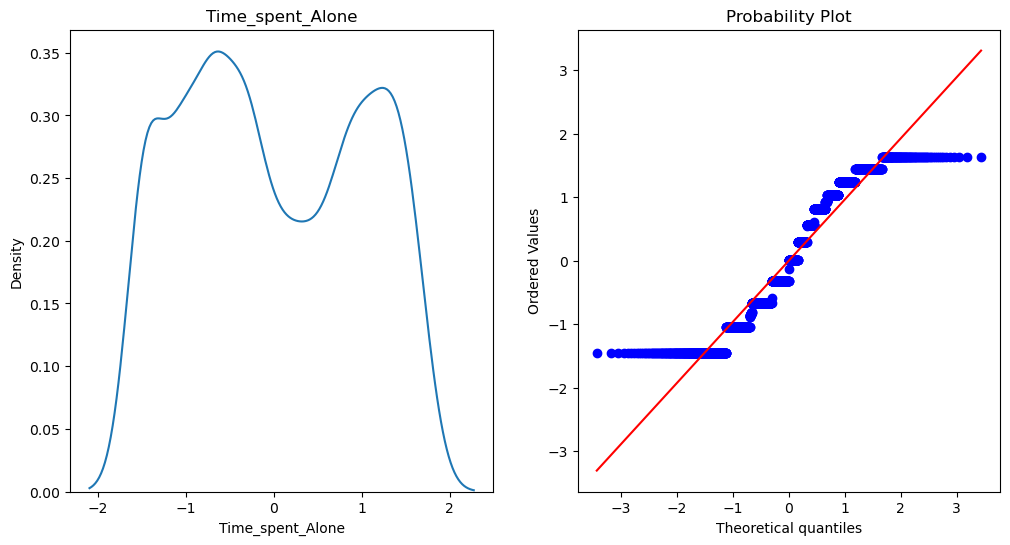

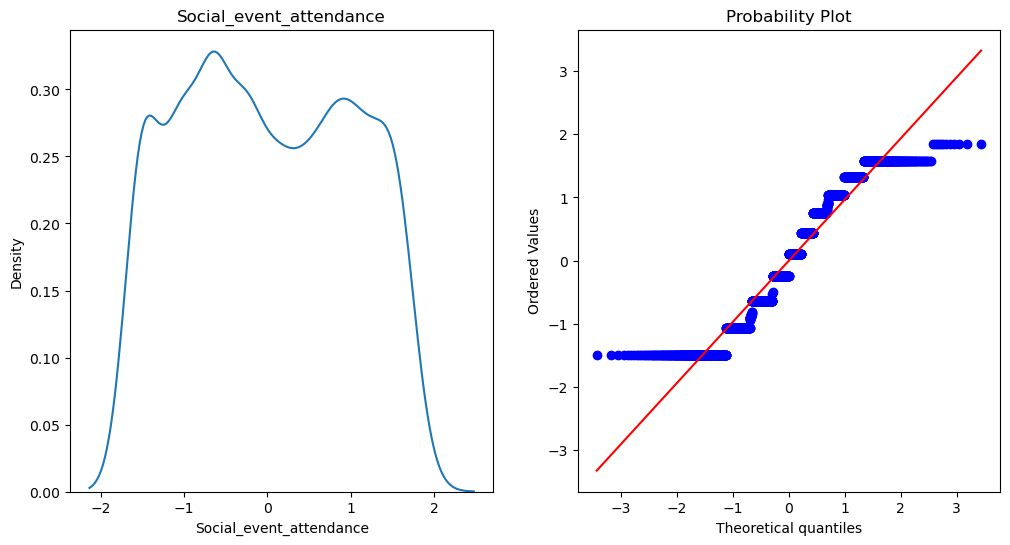

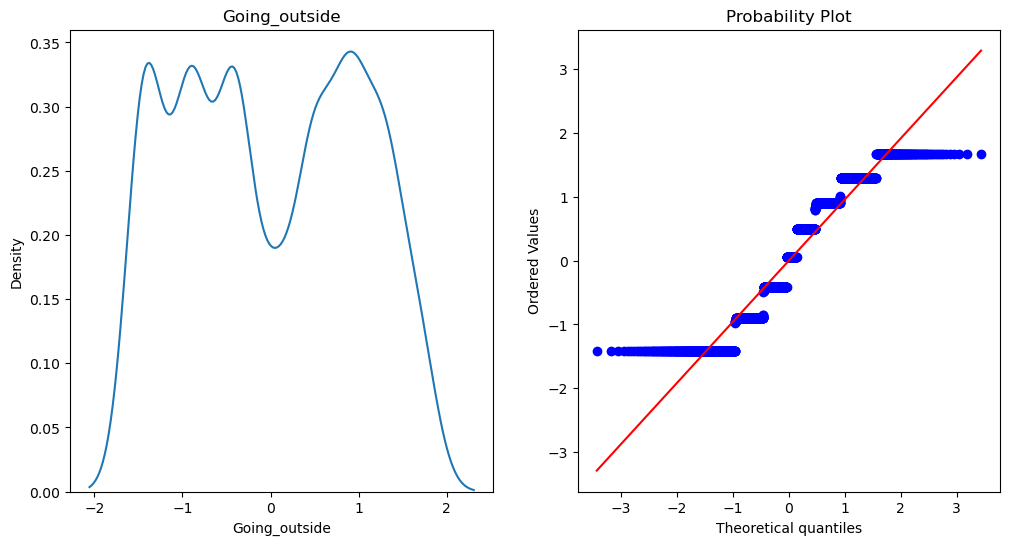

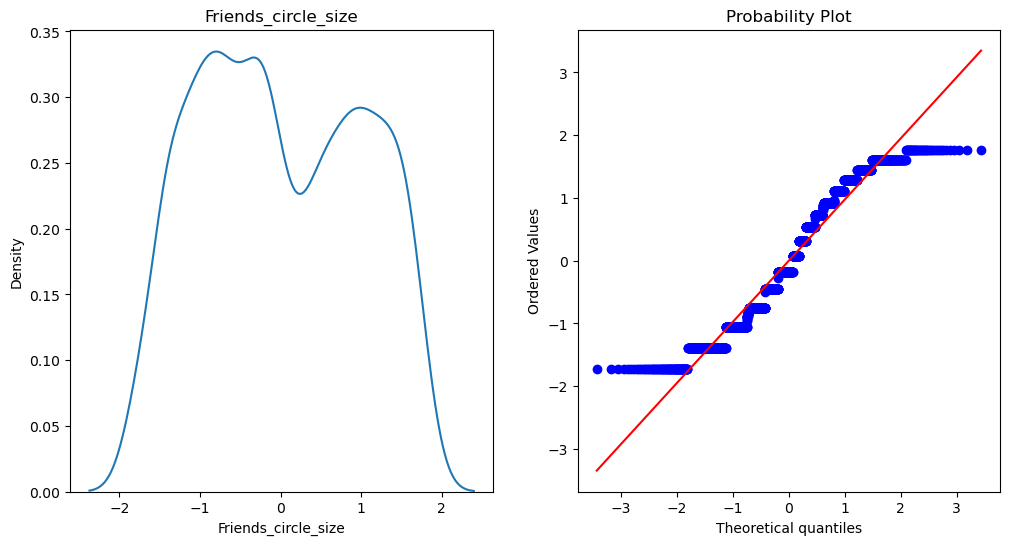

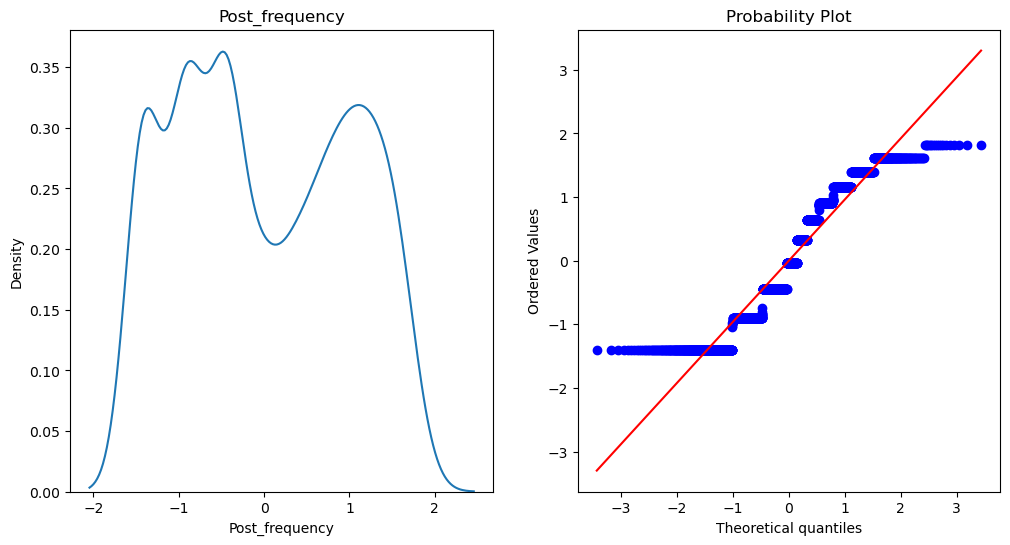

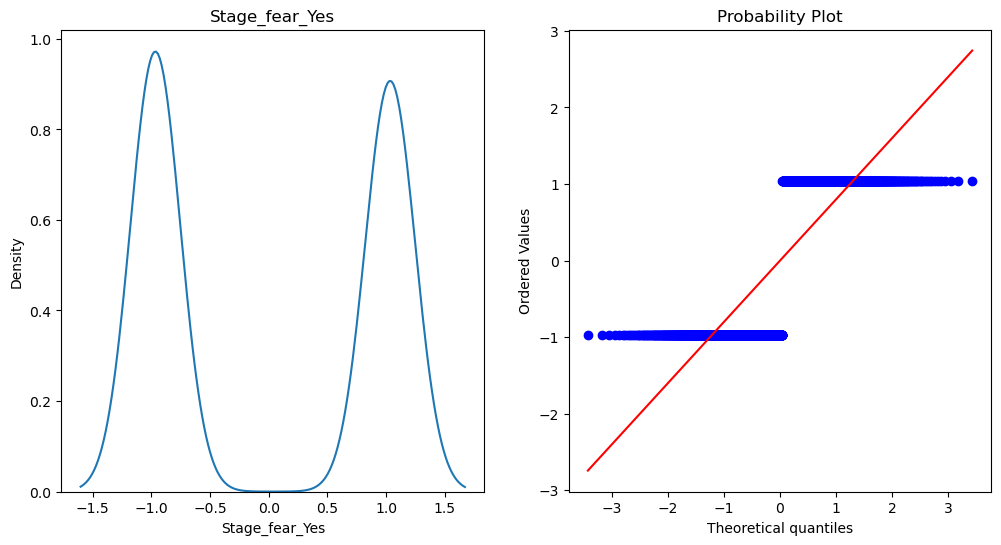

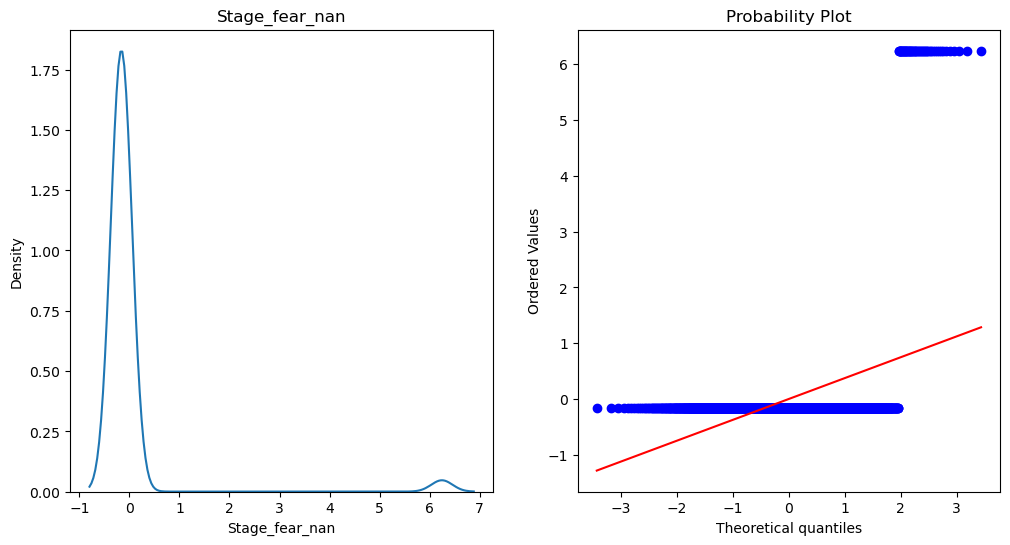

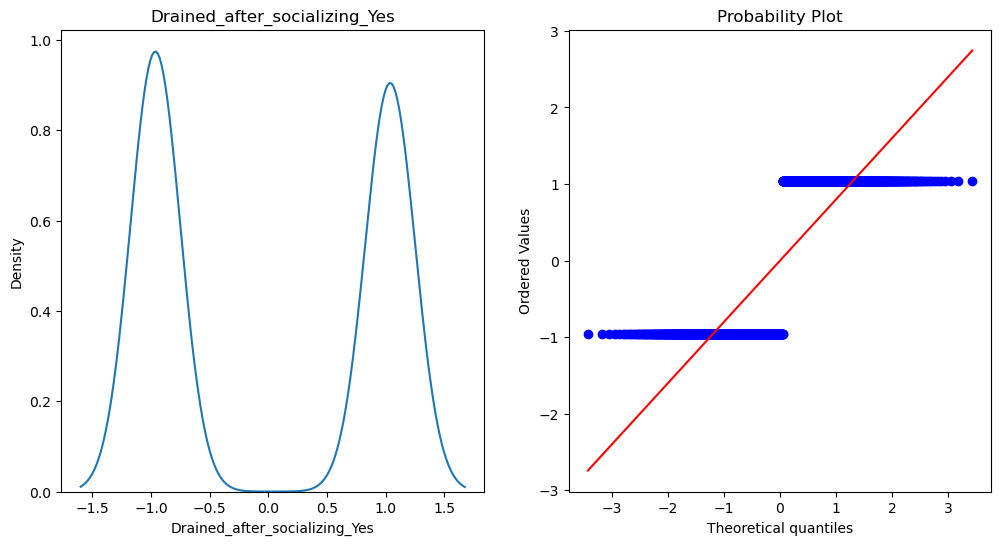

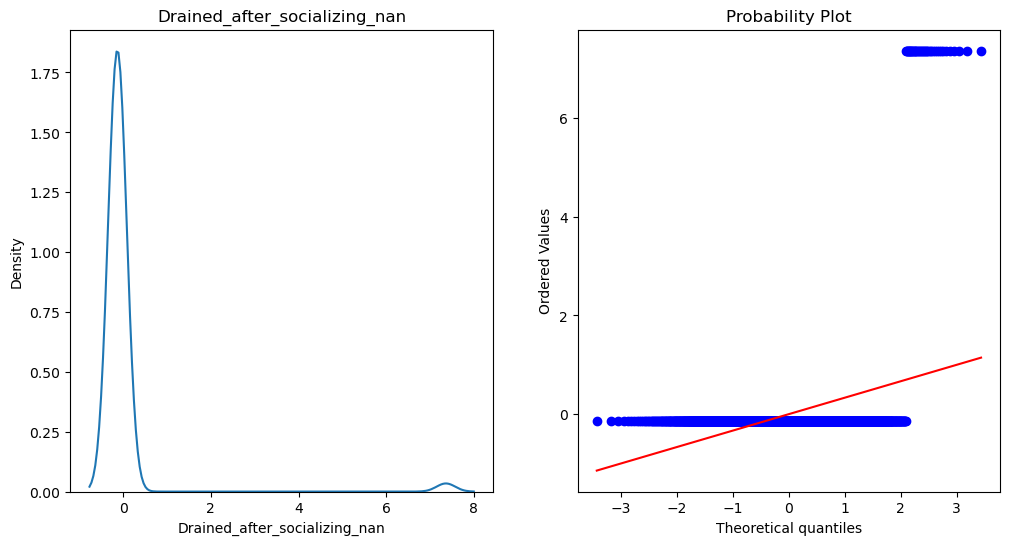

In [45]:
for col in x_train_trf_df:
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.kdeplot(x_train_trf_df[col])
    plt.title(col)

    plt.subplot(1,2,2)
    stats.probplot(x_train_trf_df[col],dist='norm',plot=plt)

In [46]:
lr1=LinearRegression()
lr1.fit(x_train_trf_df,y_train)

LinearRegression()

In [47]:
y_pred1=lr1.predict(x_test_trf_df)

In [48]:
print(r2_score(y_test,y_pred1))

0.7245290267869686


In [50]:
np.mean(cross_val_score(lr,x_train_trf_df,y_train,scoring='r2'))

0.747269316866351

In [51]:
np.mean(cross_val_score(lr,x_test_trf_df,y_test,scoring='r2'))


0.7154259238634357

# It Represents that the Transformation is not Usefull.

In [53]:
# Supervised Problem..

In [54]:
# Categorical Dataset

In [55]:
# Logistic Regression can be applied easily .. 